In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-54.352526165872085 -49.50388419226141
-60.91105324985844 93.46946436770082
78.7993728999688 11.748678495395211
-16.404062748943588 168.8299665773548
-19.835819247998742 25.818155742436034
26.757871345371 -1.8410552441459629
-86.49410212684805 -128.64743876386794
-57.713502608098594 111.339508582203
-76.71652986659814 54.725449655760144
-3.618664500987421 93.50978406002321
-75.97747532331971 5.966445094841021
79.80508672727547 -157.34900960010776
-69.26817390584512 -23.56312224457224
-89.51845075677006 -83.81731319137862
-73.166832619468 89.31600952290194
-19.341861156959084 75.40942051365039
-58.77857642591292 31.433356164448895
5.875455255867578 -149.81200921813857
23.469856590436038 133.6556351613055
-34.205404958958866 -58.035750065514605
21.422330733278756 125.83795958867421
14.268860919956055 76.73049879783844
-63.447787623897526 24.979237394740835
-76.13045430575525 -159.01351978853262
-55.50110928492414 12.405889900165562
7.698784154749021 17.47477451242284
38.75368763375309 29

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | vila
Processing Record 5 of Set 1 | nata
Processing Record 6 of Set 1 | adrar
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | padang
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | naze
Processing Record 18 of Set 1 | colonia
Processing Record 19 of Set 1 | ishigaki
Processing Record 20 of Set 1 | challakere
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of 

Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | catuday
Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | requena
Processing Record 43 of Set 4 | ambilobe
Processing Record 44 of Set 4 | yar-sale
Processing Record 45 of Set 4 | hay river
Processing Record 46 of Set 4 | ossora
Processing Record 47 of Set 4 | broken hill
Processing Record 48 of Set 4 | sao francisco
Processing Record 49 of Set 4 | pacific grove
Processing Record 50 of Set 4 | olinda
Processing Record 1 of Set 5 | vardo
Processing Record 2 of Set 5 | anchorage
Processing Record 3 of Set 5 | tuatapere
Processing Record 4 of Set 5 | yellowknife
Processing Record 5 of Set 5 | nuevo progreso
Processing Record 6 of Set 5 | fuengirola
Processing Record 7 of Set 5 | sarakhs
Processing Record 8 of Set 5 | novopokrovka
Processing Record 9 of Set 5 | port-gentil
Processing Record 10 of Set 5 | westport
Processing Record 11 of Set 5 | america

Processing Record 21 of Set 8 | la ronge
Processing Record 22 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 23 of Set 8 | fukue
Processing Record 24 of Set 8 | neryungri
Processing Record 25 of Set 8 | illapel
Processing Record 26 of Set 8 | burkburnett
Processing Record 27 of Set 8 | calvinia
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | vilaka
Processing Record 30 of Set 8 | inhambane
Processing Record 31 of Set 8 | yerbogachen
Processing Record 32 of Set 8 | boende
Processing Record 33 of Set 8 | sitka
Processing Record 34 of Set 8 | shimoda
Processing Record 35 of Set 8 | voznesenskoye
Processing Record 36 of Set 8 | ituni
City not found. Skipping...
Processing Record 37 of Set 8 | roma
Processing Record 38 of Set 8 | djambala
Processing Record 39 of Set 8 | gat
Processing Record 40 of Set 8 | mato verde
Processing Record 41 of Set 8 | coulihaut
City not found. Skipping...
Processing Record 42 of Set 8 | zeya
Processing Record 

Processing Record 11 of Set 12 | san joaquin
Processing Record 12 of Set 12 | maryville
Processing Record 13 of Set 12 | manta
Processing Record 14 of Set 12 | ucluelet
Processing Record 15 of Set 12 | henties bay
Processing Record 16 of Set 12 | aguas vermelhas
Processing Record 17 of Set 12 | aguimes
Processing Record 18 of Set 12 | shchors
Processing Record 19 of Set 12 | chagda
City not found. Skipping...
Processing Record 20 of Set 12 | raymond
Processing Record 21 of Set 12 | hirara
Processing Record 22 of Set 12 | umm ruwabah
City not found. Skipping...
Processing Record 23 of Set 12 | kimbe
Processing Record 24 of Set 12 | buug
Processing Record 25 of Set 12 | kamenka
Processing Record 26 of Set 12 | turbat
Processing Record 27 of Set 12 | hoquiam
Processing Record 28 of Set 12 | masallatah
Processing Record 29 of Set 12 | simbahan
Processing Record 30 of Set 12 | kalmunai
Processing Record 31 of Set 12 | thomasville
Processing Record 32 of Set 12 | ulagan
Processing Record 33 

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,52.09,89,40,8.05,AR,2022-10-04 03:32:05
1,Busselton,-33.6500,115.3333,62.40,60,0,13.29,AU,2022-10-04 03:32:05
2,Vila,42.0304,-8.1588,52.68,50,4,1.59,PT,2022-10-04 03:32:05
3,Nata,8.3333,-80.5167,75.99,86,87,4.25,PA,2022-10-04 03:32:06
4,Adrar,20.5022,-10.0711,87.69,31,60,10.36,MR,2022-10-04 03:32:06
5,Rikitea,-23.1203,-134.9692,71.64,66,59,21.30,PF,2022-10-04 03:32:06
6,Albany,42.6001,-73.9662,48.45,79,100,4.14,US,2022-10-04 03:32:07
7,East London,-33.0153,27.9116,61.74,63,0,9.22,ZA,2022-10-04 03:32:07
8,Padang,-0.9492,100.3543,82.45,86,100,4.79,ID,2022-10-04 03:27:27
9,Hermanus,-34.4187,19.2345,53.80,67,69,5.64,ZA,2022-10-04 03:30:33


In [21]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df =city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mar Del Plata,40,AR,2022-10-04 03:32:05,89,-38.0023,-57.5575,52.09,8.05
1,Busselton,0,AU,2022-10-04 03:32:05,60,-33.6500,115.3333,62.40,13.29
2,Vila,4,PT,2022-10-04 03:32:05,50,42.0304,-8.1588,52.68,1.59
3,Nata,87,PA,2022-10-04 03:32:06,86,8.3333,-80.5167,75.99,4.25
4,Adrar,60,MR,2022-10-04 03:32:06,31,20.5022,-10.0711,87.69,10.36
...,...,...,...,...,...,...,...,...,...
567,Ormara,3,PK,2022-10-04 03:46:52,80,25.2088,64.6357,79.92,8.14
568,Medvezhyegorsk,100,RU,2022-10-04 03:46:53,98,62.9167,34.4667,43.68,6.51
569,Oranjestad,6,AW,2022-10-04 03:46:53,80,12.5240,-70.0270,83.97,21.27
570,Gurupi,2,BR,2022-10-04 03:46:54,48,-11.7292,-49.0686,79.38,2.66


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [23]:
%matplotlib inline 

In [24]:
# Import dependencies.
import matplotlib.pyplot as plt

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

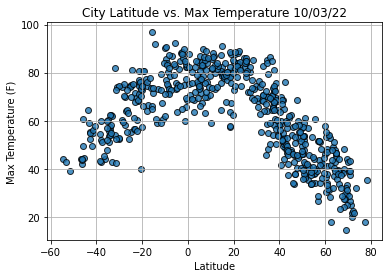

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

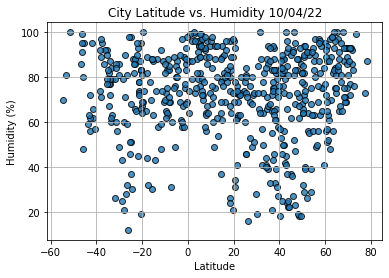

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

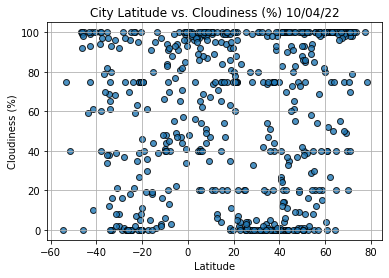

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

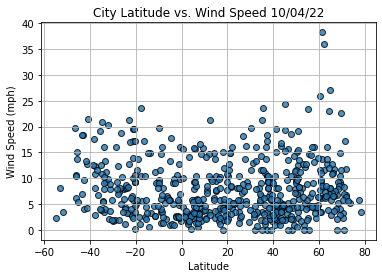

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()